<a href="https://colab.research.google.com/github/deathclassic/CarPredict/blob/main/CarPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA PREPARATION

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [3]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
df.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [4]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [5]:
cols = list(df.dtypes[df.dtypes == 'object'].index)
for col in cols:
  df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## EXPLORATORY DATA ANALYSIS

In [6]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
df.groupby('make').agg(['mean']).round().reset_index()

,make,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
,,mean,mean,mean,mean,mean,mean,mean,mean
0,acura,2010.0,245.0,5.0,4.0,28.0,20.0,204.0,34888.0
1,alfa_romeo,2015.0,237.0,4.0,2.0,34.0,24.0,113.0,61600.0
2,aston_martin,2013.0,484.0,11.0,2.0,19.0,13.0,259.0,197910.0
3,audi,2012.0,278.0,6.0,3.0,29.0,20.0,3105.0,53452.0
4,bentley,2012.0,534.0,10.0,3.0,19.0,12.0,520.0,247169.0
5,bmw,2014.0,327.0,6.0,3.0,29.0,21.0,3916.0,61547.0
6,bugatti,2008.0,1001.0,16.0,2.0,14.0,8.0,820.0,1757224.0
7,buick,2010.0,219.0,5.0,4.0,27.0,19.0,155.0,28207.0
8,cadillac,2013.0,332.0,6.0,4.0,25.0,17.0,1624.0,56231.0


In [8]:
for col in df:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

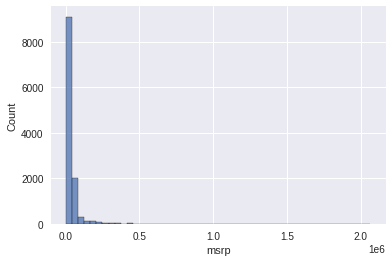

In [10]:
sns.histplot(df.msrp, bins=50)
plt.show()

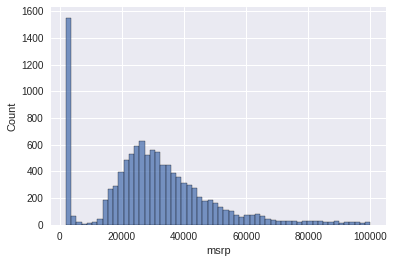

In [11]:
sns.histplot(df.msrp[df.msrp < 100000])
plt.show()

In [12]:
np.log1p([0,1,10,100,1000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

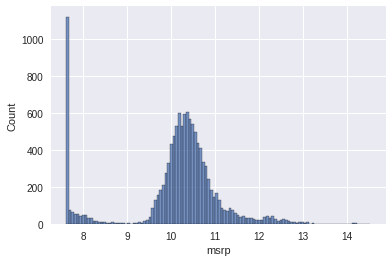

In [13]:
log_prices = np.log1p(df.msrp)
sns.histplot(log_prices)
plt.show()

In [14]:
df.isna().mean()

make                 0.000000
model                0.000000
year                 0.000000
engine_fuel_type     0.000252
engine_hp            0.005792
engine_cylinders     0.002518
transmission_type    0.000000
driven_wheels        0.000000
number_of_doors      0.000504
market_category      0.314084
vehicle_size         0.000000
vehicle_style        0.000000
highway_mpg          0.000000
city_mpg             0.000000
popularity           0.000000
msrp                 0.000000
dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [16]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [17]:
ind = np.arange(n)
np.random.seed(2)
np.random.shuffle(ind)

In [18]:
df_val = df.iloc[ind[n_train:n_train+n_val]]
df_test = df.iloc[ind[n_train+n_val:]]
df_train = df.iloc[ind[:n_train]]

In [19]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [20]:
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [21]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [22]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

## LINEAR REGRESSION

$$ w = (X^TX)^{-1}X^Ty$$

In [23]:
def train_lin_reg(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return w[0], w[1:]

In [24]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
X = np.array(X)
y = np.array(y)
train_lin_reg(X, y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [25]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [26]:
w0, w = train_lin_reg(X_train, y_train)
y_pred = w0 + X_train.dot(w)

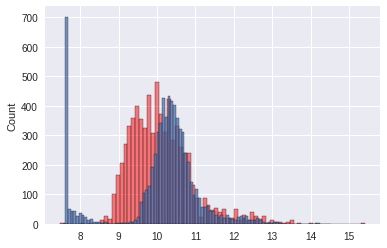

In [27]:
sns.histplot(y_pred, color='red', alpha=0.5)
sns.histplot(y_train)
plt.show()

## Root Mean Square Error

$$ RMSE = \sqrt{\frac{1}{m}\sum(y_{pred} - y)^2}$$

In [28]:
import math

In [29]:
def rmse(y_pred, y):
  m = 1/len(y_pred)
  return math.sqrt(m * sum((y_pred - y)**2))

In [30]:
rmse(y_pred, y_train)

0.7554192603920122

## Model Validation

In [31]:
def get_X(df):
  base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
  X = df[base].fillna(0).values
  return X  

In [32]:
X_train = get_X(df_train)
w0, w = train_lin_reg(X_train, y_train)

In [33]:
X_val = get_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_pred, y_val)

0.7616530991301557

## Feature Engineering

In [34]:
def get_X(df):
  df = df.copy()
  df['age'] = df.year.max() - df.year
  base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
          'city_mpg', 'popularity', 'age']
  X = df[base].fillna(0).values
  return X

In [36]:
X_train = get_X(df_train)
w0, w = train_lin_reg(X_train, y_train)

In [37]:
X_val = get_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_pred, y_val)

0.5172055461058298

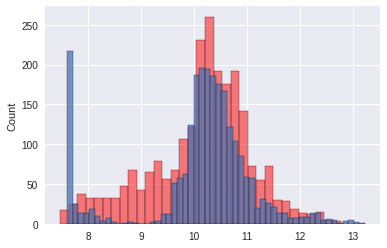

In [38]:
sns.histplot(y_pred, color='red', alpha=0.5)
sns.histplot(y_val)
plt.show()

## Categorical variables

In [39]:
for i in [2,3,4]:
  df_train[f'num_doors_{i}'] = (df_train.number_of_doors == i).astype('int')

In [40]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [41]:
df_train = df_train.drop(df_train.filter(regex='num_doors_').columns, axis=1)
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [42]:
def get_X(df):
  df = df.copy()
  df['age'] = df.year.max() - df.year
  for i in [2,3,4]:
    df[f'num_doors_{i}'] = (df.number_of_doors == i).astype('int')
  doors = list(df_train.filter(regex='num_doors_').columns)
  base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
          'city_mpg', 'popularity', 'age']
  base = base + doors
  X = df[base].fillna(0).values
  return X

In [43]:
X_train = get_X(df_train)
w0, w = train_lin_reg(X_train, y_train)

In [44]:
X_val = get_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_pred, y_val)

0.5172055461058298

In [45]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [46]:
base_features = ['engine_hp', 'engine_cylinders', 'highway_mpg',
                 'city_mpg', 'popularity']
categories = list(df.select_dtypes(['object']).columns)
max_year = df.year.max()

cat_values = {}
for cat in categories:
  cat_values[cat] = list(df[cat].value_counts().head(10).index)
cat_values

{'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel',
  'electric',
  'flex-fuel_(premium_unleaded_required/e85)',
  'flex-fuel_(premium_unleaded_recommended/e85)',
  'flex-fuel_(unleaded/natural_gas)',
  'natural_gas'],
 'make': ['chevrolet',
  'ford',
  'volkswagen',
  'toyota',
  'dodge',
  'nissan',
  'gmc',
  'honda',
  'mazda',
  'cadillac'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback',
  'performance',
  'crossover,luxury',
  'luxury,high-performance',
  'exotic,high-performance',
  'hatchback,performance'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible',
  'tacoma',
  'gti',
  'frontier',
  'beetle',
  'accord'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manua

In [47]:
def get_X(df):
  features = base_features.copy()
  df = df.copy()

  df['age'] = max_year - df.year
  features.append('age')
  for i in [2,3,4]:
    df[f'num_doors_{i}'] = (df.number_of_doors == i).astype('int')
    features.append(f'num_doors_{i}')

  for cat, values in cat_values.items(): 
    for value in values:
      df[f'{cat}_{value}'] = (df[cat] == value).astype('int')
      features.append(f'{cat}_{value}')
  
  X = df[features].fillna(0).values
  return X

In [48]:
X_train = get_X(df_train)
w0, w = train_lin_reg(X_train, y_train)
X_val = get_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_pred, y_val)

LinAlgError: ignored

In [49]:
# adding a small number (r) to a matrix' main diagonal to avoid repeaiting values

def train_lin_reg(X, y, r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX  + r * np.eye(XTX.shape[0])
  w = np.linalg.inv(XTX).dot(X.T).dot(y)
  return w[0], w[1:]

In [51]:
X_train = get_X(df_train)
w0, w = train_lin_reg(X_train, y_train)
X_val = get_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_pred, y_val)

0.4376643681915939

## Tuning the model

In [52]:
r = 10
scores = {}
for i in range(5):
  X_train = get_X(df_train)
  w0, w = train_lin_reg(X_train, y_train, r)
  X_val = get_X(df_val)
  y_pred = w0 + X_val.dot(w)
  scores[r] = rmse(y_pred, y_val)
  r = r/10

In [53]:
print(f'{min(scores)} = {scores[min(scores)]}')

0.001 = 0.4376643681915939


## Final model

In [54]:
df_train = pd.concat([df_train, df_val]).reset_index(drop=True)
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [55]:
X_train = get_X(df_train)
y_train = np.concatenate([y_train, y_val])

In [56]:
w0, w = train_lin_reg(X_train, y_train, r=0.001)
X_test = get_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

0.43323838035034673

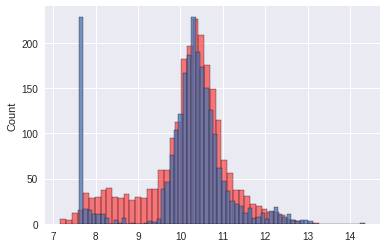

In [57]:
sns.histplot(y_pred, color='red', alpha=0.5)
sns.histplot(y_test)
plt.show()

In [60]:
# lets predict a car price
np.random.seed(2)
i = np.random.randint(1, len(df_test), size=1)
car = get_X(df_test.iloc[i])
price_pred = w0 + car.dot(w)
price = y_test[i]
print(f'Predicted price: {np.expm1(price_pred)}')
print(f'Actual price:: {np.expm1(price)}')

Predicted price: [41904.07923623]
Actual price:: [40095.]
